## Observations and Insights 

In [51]:
%matplotlib inline
#%matplotlib notebook

In [52]:
# Julie Baker
# Pymaceuticals
# June 2021

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np 

# Study data files
mouse_metadata_path = os.path.join(os.getcwd(), "data", "Mouse_metadata.csv")
study_results_path = os.path.join(os.getcwd(), "data", "Study_results.csv")
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allmice_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# Display the data table for preview
allmice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [54]:
# Checking the number of mice.
unique_mice = allmice_df['Mouse ID'].nunique()

In [55]:
#J: just getting further sense of the dataset to guage how much data may be lost
# 1893/249 = 7.6; 1893/10 = 189.3
datapoints = allmice_df['Timepoint'].nunique()

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplo_rows_df = allmice_df[allmice_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print("Duplicate Rows :")
duplo_rows_df

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = allmice_df.loc[allmice_df['Mouse ID'] == 'g989', :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = allmice_df.loc[allmice_df['Mouse ID'] != 'g989', :]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [59]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [61]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [62]:
#test_indexing = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

In [63]:
# mean tumor volue
tumor_mean_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean_df

Drug Regimen
Capomulin   40.68
Ceftamin    52.59
Infubinol   52.88
Ketapril    55.24
Naftisol    54.33
Placebo     54.03
Propriva    52.32
Ramicane    40.22
Stelasyn    54.23
Zoniferol   53.24
Name: Tumor Volume (mm3), dtype: float64

In [64]:
# median tumor volume 
tumor_med_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_med_df

Drug Regimen
Capomulin   41.56
Ceftamin    51.78
Infubinol   51.82
Ketapril    53.70
Naftisol    52.51
Placebo     52.29
Propriva    50.45
Ramicane    40.67
Stelasyn    52.43
Zoniferol   51.82
Name: Tumor Volume (mm3), dtype: float64

In [65]:
# variance tumor volume 
tumor_var_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_var_df

Drug Regimen
Capomulin   24.95
Ceftamin    39.29
Infubinol   43.13
Ketapril    68.55
Naftisol    66.17
Placebo     61.17
Propriva    43.85
Ramicane    23.49
Stelasyn    59.45
Zoniferol   48.53
Name: Tumor Volume (mm3), dtype: float64

In [66]:
# standard deviation tumor volume
tumor_std_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_std_df

Drug Regimen
Capomulin   4.99
Ceftamin    6.27
Infubinol   6.57
Ketapril    8.28
Naftisol    8.13
Placebo     7.82
Propriva    6.62
Ramicane    4.85
Stelasyn    7.71
Zoniferol   6.97
Name: Tumor Volume (mm3), dtype: float64

In [67]:
# SEM of the tumor volume
tumor_sem_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_sem_df

Drug Regimen
Capomulin   0.33
Ceftamin    0.47
Infubinol   0.49
Ketapril    0.60
Naftisol    0.60
Placebo     0.58
Propriva    0.54
Ramicane    0.32
Stelasyn    0.57
Zoniferol   0.52
Name: Tumor Volume (mm3), dtype: float64

In [68]:
# merging to single dataframe
summary_lw_df = pd.merge(tumor_mean_df,tumor_med_df, on='Drug Regimen')
summary_lw_df

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.68,41.56
Ceftamin,52.59,51.78
Infubinol,52.88,51.82
Ketapril,55.24,53.70
Naftisol,54.33,52.51
Placebo,54.03,52.29
Propriva,52.32,50.45
Ramicane,40.22,40.67
Stelasyn,54.23,52.43


In [69]:
summary_lw_df = pd.merge(summary_lw_df,tumor_var_df, on='Drug Regimen')
# rename first 3 columns before merging the remaining
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median','Tumor Volume (mm3)':'Variance'})
# merge std & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_std_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
# merge sem & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_sem_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Error of Mean'})
# formatting numbers NOT WORKING
# summary_lw_df = pd.options.display.float_format('{:.2f}').format
summary_lw_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [ ]:
## TRY TO REFORMAT DATA FRAME: number format, maybe column names

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#J: This is how I did it to start with, so I went back & wrote out the long way above.
summary1_df = clean_mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary1_df

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [72]:
# looking at clean_mice so I don't have to scroll up --TAKE OUT LATER
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [107]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x = drug
# y = total number of timepoints
plot1_df = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()
plot1_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [108]:
# I couldn't call the columns later on because Timepoint was missing its name, but now that I can rename these, I should be able to call it for the next step.
# not working, it's not letting me call drug regimen
plot1_df = pd.merge(plot1_df, plot1_df, on='Drug Regimen')
plot1_df

,Timepoint_x,Timepoint_y
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [109]:
# testing some stuff I saw in a video
plot1_df.iloc[:]

,Timepoint_x,Timepoint_y
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [110]:
# renaming the columns & removing the duplicate
plot1_df = plot1_df.rename(columns={'Timepoint_x':'Total Timepoints','Timepoint_y':'duplicates'})

In [111]:
# removing duplicate column
plot1_df = plot1_df.drop(columns='duplicates')

In [112]:
# failed attempt to add treatments as a duplicate column that I can call
# plot1_df['Treatment'] = [treatments]

In [113]:
# failed attempt to add treatments as a duplicate column that I can call
# plot1_again_df['Treatment'] = plot1_df.reindex()

* EXAMPLE FROM CLASS: Create an array that contains the number of users each language has
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

In [114]:
# plot1 in pandas
# creating an empty list for drugs
# list of treatments
treatments = [clean_mice_df.groupby('Drug Regimen')['Drug Regimen'].unique()]
treatments
# DO NOT UNDERSTAND WHY THIS IS SAYING IT'S 1 OBJECT WHEN TRYING TO PASS IT IN TO ADD COLUMN TO DATAFRAMES BELOW

[Drug Regimen
 Capomulin    [Capomulin]
 Ceftamin      [Ceftamin]
 Infubinol    [Infubinol]
 Ketapril      [Ketapril]
 Naftisol      [Naftisol]
 Placebo        [Placebo]
 Propriva      [Propriva]
 Ramicane      [Ramicane]
 Stelasyn      [Stelasyn]
 Zoniferol    [Zoniferol]
 Name: Drug Regimen, dtype: object]

In [115]:
# making list by hand :(
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [116]:
# pulling from activity Pandas.1.13 folder
x_axis = drugs
x_axis

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [117]:
y_axis = (plot1_df['Total Timepoints'])
y_axis

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Total Timepoints, dtype: int64

In [118]:
#tick_locations = [value+0.4 for value in x_axis]

<AxesSubplot:xlabel='Drug Regimen'>

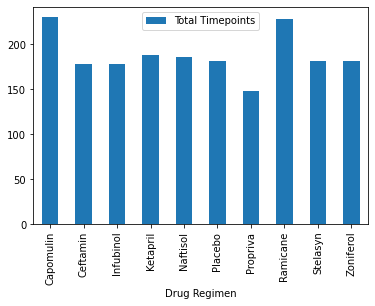

In [148]:
# ** Pands DataFrame BAR CHART **
plot1_df.plot.bar()

<Figure size 1440x216 with 0 Axes>

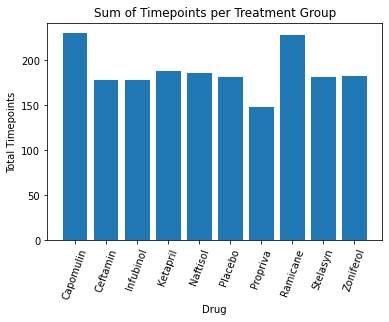

<Figure size 1440x216 with 0 Axes>

In [139]:
# ** Matplotlib BAR CHART **
plt.title('Sum of Timepoints per Treatment Group')
plt.xlabel('Drug')
plt.ylabel('Total Timepoints')
plt.bar(x=x_axis, height=y_axis)
plt.xticks(x_axis, rotation=70)
plt.figure(figsize=(20,3))

# pulling from activity Pandas.1.13 folder
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, plot1_df)
#, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, plot1_df[1])

* Tell matplotlib that we will be making a bar chart
* Users is our y axis and x_axis is, of course, our x axis
* We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
# plot1 in matplotlib



* Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

* Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

* Sets the y limits of the current chart
plt.ylim(0, max(users)+5000)

* Give our chart some labels and a tile
plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")

# PIE CHARTS

In [122]:
# creating dataframe for pie charts
mice_gender_df = clean_mice_df.groupby(['Sex'])['Mouse ID'].nunique()
mice_gender_df

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [123]:
# NOT CURRENTLY USING, CONSIDER DITCHING
# transferring counts to variables so I don't have to remember index numbers
female_count = mice_gender_df[0]
male_count = mice_gender_df[1]
female_count, male_count

(123, 125)

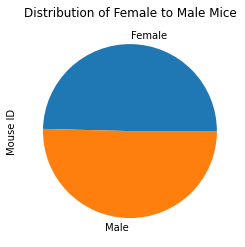

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_panda_pie = mice_gender_df.plot.pie(title= "Distribution of Female to Male Mice")

([<matplotlib.patches.Wedge at 0x11da7d340>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

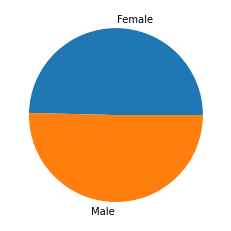

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
gender_counts = [(mice_gender_df[0]), mice_gender_df[1]]
plt.pie(gender_counts, labels= genders) 
# plt.axis("equal")  # ** GETTING TypeError: 'str' object is not callable
# plt.title('Distribution of Female to Male Mice')

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [127]:
# last/greatest timepoint for each mouse
last_timepoint_df = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [128]:
# inner merge with clean_mice
final_time_df = pd.merge(clean_mice_df, last_timepoint_df, on=['Mouse ID','Timepoint'], how='inner')
final_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.05,1
1,s185,Capomulin,Female,3,17,45,23.34,1
2,x401,Capomulin,Female,16,15,45,28.48,0
3,m601,Capomulin,Male,22,17,45,28.43,1
4,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.93,0
244,z435,Propriva,Female,12,26,10,48.71,0
245,z581,Infubinol,Female,24,25,45,62.75,3
246,z795,Naftisol,Female,13,29,45,65.74,3


In [129]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [130]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
chosen_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [131]:
# create empty list to fill with looping
tumor_volumes = []

In [132]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [133]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [134]:
# dataframe for capomulin only
capomulin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Capomulin', :]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.34,1
2,x401,Capomulin,Female,16,15,45,28.48,0
3,m601,Capomulin,Male,22,17,45,28.43,1
6,f966,Capomulin,Male,16,17,20,30.49,0
10,u364,Capomulin,Male,18,17,45,31.02,3
12,y793,Capomulin,Male,17,17,45,31.90,2
13,r554,Capomulin,Female,8,17,45,32.38,3
14,m957,Capomulin,Female,3,19,45,33.33,1
16,t565,Capomulin,Female,20,17,45,34.46,0
20,i738,Capomulin,Female,23,20,45,37.31,2


In [135]:
# should I have done all lines of data rather than just endpoint?
weight = [capomulin_df['Weight (g)']]

In [136]:
# should I have done the average of the tumors for all of the datapoints rather than just the endpoints?
tumor_vol = [capomulin_df['Tumor Volume (mm3)']]

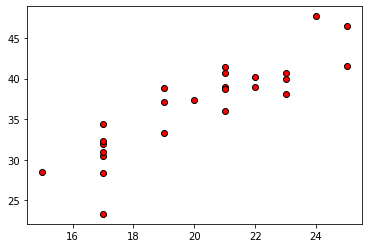

In [137]:
plt.scatter(weight, tumor_vol, marker='o', facecolors='red', edgecolors='black')

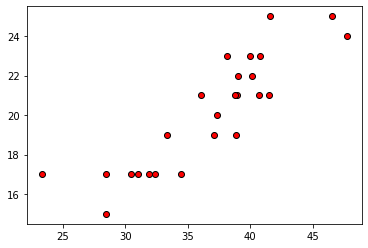

In [138]:
# just looking at reverse
plt.scatter(tumor_vol, weight, marker='o', facecolors='red', edgecolors='black')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
